In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Archive/Machine Learning/Dataset/WineQT.csv')

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [8]:
df['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [5]:
df['alcohol'].unique()

array([ 9.4       ,  9.8       , 10.        ,  9.5       ,  9.2       ,
        9.9       ,  9.1       , 10.5       ,  9.7       ,  9.3       ,
       10.1       ,  9.6       , 10.8       , 10.3       , 13.1       ,
       10.2       , 10.9       , 10.7       ,  9.        , 13.        ,
       14.        , 10.4       , 11.5       , 11.4       , 12.4       ,
       11.        , 12.2       , 12.8       , 12.6       , 10.6       ,
       11.7       , 12.5       , 12.        , 11.9       ,  8.7       ,
       13.3       , 12.9       , 12.3       , 11.2       , 11.1       ,
       13.4       , 11.3       , 11.6       , 12.1       , 11.8       ,
        8.4       , 12.7       , 14.9       , 13.2       , 13.6       ,
       10.03333333,  9.55      ,  8.5       , 11.06666667,  8.8       ,
       13.56666667, 11.95      ,  9.95      ,  9.23333333,  9.25      ,
       10.55      ])

In [39]:
df['Id'].isnull().value_counts()

Id
False    1143
Name: count, dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


### Train and Split

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()

In [14]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [17]:
knn_model.fit(scaled_X_train, y_train)

KNeighborsClassifier()

### Model Evaluation

In [18]:
y_pred = knn_model.predict(scaled_X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [20]:
accuracy_score(y_test, y_pred)

0.5589519650655022

In [40]:
confusion_matrix(y_test, y_pred)

array([[ 0,  4,  2,  0,  0],
       [ 2, 64, 29,  1,  0],
       [ 1, 28, 58, 12,  0],
       [ 0,  4, 16,  6,  0],
       [ 0,  1,  1,  0,  0]], dtype=int64)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.63      0.67      0.65        96
           6       0.55      0.59      0.57        99
           7       0.32      0.23      0.27        26
           8       0.00      0.00      0.00         2

    accuracy                           0.56       229
   macro avg       0.30      0.30      0.30       229
weighted avg       0.54      0.56      0.55       229



C:\Users\danisha.ansari\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\danisha.ansari\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\danisha.ansari\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

### Using grid search to understand the best performing parameters

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [46]:
X_cv, y_test, y_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [48]:
scaler = StandardScaler()

In [51]:
knn = KNeighborsClassifier()

In [52]:
operations = [('scaler', scaler),('knn', knn)]

In [53]:
from sklearn.pipeline import Pipeline

In [54]:
pipe = Pipeline(operations)

In [55]:
from sklearn.model_selection import GridSearchCV

In [72]:
k_values = list(range(1,20))

In [73]:
param_grid = {'knn__n_neighbors': k_values}

In [74]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [75]:
full_cv_classifier.fit(X_cv,y_cv)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [76]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=19))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=19),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 19,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [77]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.56666667, 0.53497868, 0.5218339 , 0.53713445, 0.53493665,
       0.5623191 , 0.53604756, 0.5590224 , 0.54372185, 0.55137213,
       0.54479673, 0.55904642, 0.56339398, 0.5557317 , 0.56010929,
       0.56339398, 0.56558578, 0.56888849, 0.56998138])

Text(0, 0.5, 'Accuracy')

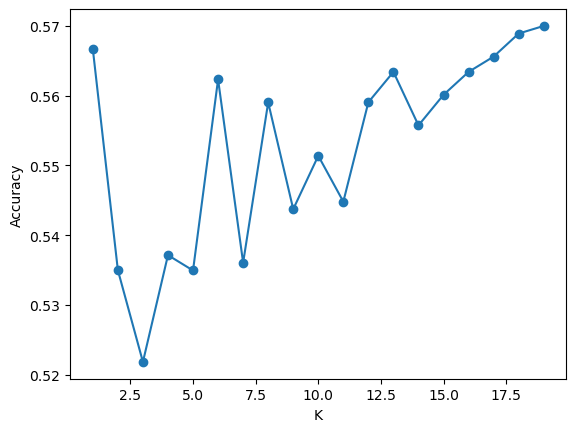

In [78]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

In [79]:
pred = full_cv_classifier.predict(X_test)

In [80]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [81]:
accuracy_score(y_test, pred)

0.62882096069869

In [82]:
confusion_matrix(y_test,pred)

array([[ 0,  3,  3,  0,  0],
       [ 0, 71, 23,  2,  0],
       [ 0, 27, 66,  6,  0],
       [ 0,  2, 17,  7,  0],
       [ 0,  0,  0,  2,  0]], dtype=int64)

In [83]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.69      0.74      0.71        96
           6       0.61      0.67      0.63        99
           7       0.41      0.27      0.33        26
           8       0.00      0.00      0.00         2

    accuracy                           0.63       229
   macro avg       0.34      0.34      0.33       229
weighted avg       0.60      0.63      0.61       229



C:\Users\danisha.ansari\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\danisha.ansari\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\danisha.ansari\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap